### Your name:

<pre> Siqi Liu </pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Seaborn
import seaborn as sns

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Include documentation for your code 

In [2]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("data/default_of_credit_card_clients.xls", 
                   skiprows= 1, header = 0)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA

In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0


The attributes have the following meaning:

- **LIMIT_BAL** - credit limit
- **SEX** - 1 = male; 2 = female
- **EDUCATION** - 1 = graduate school; 2 = university; 3 = high school; 4 = others
- **MARRIAGE** - 1 = married; 2 = single; 3 = others
- **AGE** - in years
- **PAY_0 ... PAY_6** - repayment status, from Sep 2005 to Apr 2015. -1 = paid; 1 = delayed for one month; ... ; 9 = delayed for nine months and above
- **BILL_AMT1 ... BILL_AMT6** - amount in bill statment, from Sep 2005 to Apr 2015
- **PAY_AMT1 ... PAY_AMT6** - amount paid, from Sep 2005 to Apr 2015
- **default payment next month** - target variable. 1 = Yes, 0 = No

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

No missing data

In [6]:
# Rename target column to DEFAULT

df = df.rename(columns = {"default payment next month" : "DEFAULT"})

In [7]:
# Rename PAY_0 to PAY_1

df = df.rename(columns = {"PAY_0" : "PAY_1"})

In [8]:
# Remove ID column

df = df.drop(columns = ["ID"])

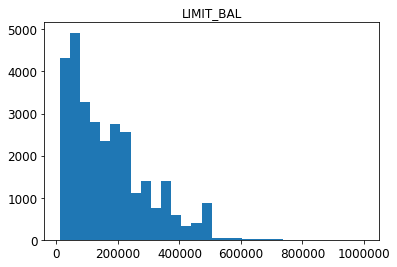

In [9]:
plt.hist(x = df['LIMIT_BAL'], bins = 30)
plt.title("LIMIT_BAL")

plt.show()

Heavily left skrewed, should normalize

In [10]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [11]:
#Rename SEX categories to M and F
df.loc[df['SEX'] == 1, 'SEX'] = 'M'
df.loc[df['SEX'] == 2, 'SEX'] = 'F'

In [12]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

There are some with EDUCATION = 0, 5 and 6. Can group them into 4, the Other category.

In [13]:
#Rename EDUCATION categories, and group extra categories into Others
df.loc[df['EDUCATION'] == 1, 'EDUCATION'] = 'GradSchool'
df.loc[df['EDUCATION'] == 2, 'EDUCATION'] = 'University'
df.loc[df['EDUCATION'] == 3, 'EDUCATION'] = 'HighSchool'
df.loc[df['EDUCATION'] == 4, 'EDUCATION'] = 'Others'
df.loc[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6), 'EDUCATION'] = 'Others'

In [14]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

There are some with MARRIAGE = 0. Can group them into 3, the Other category.

In [15]:
#Rename MARRIAGE categories, and group extra categories into Others
df.loc[df['MARRIAGE'] == 1, 'MARRIAGE'] = 'Married'
df.loc[df['MARRIAGE'] == 2, 'MARRIAGE'] = 'Single'
df.loc[df['MARRIAGE'] == 3, 'MARRIAGE'] = 'Others'
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 'Others'

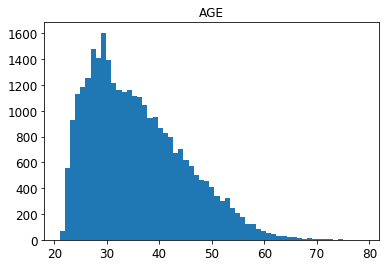

In [16]:
plt.hist(x = df['AGE'], bins = 59)
plt.title("AGE")

plt.show()

Mode is around age 30

In [17]:
df['DEFAULT'].sum() / len(df['DEFAULT'])

0.2212

The class ratio is around 22%

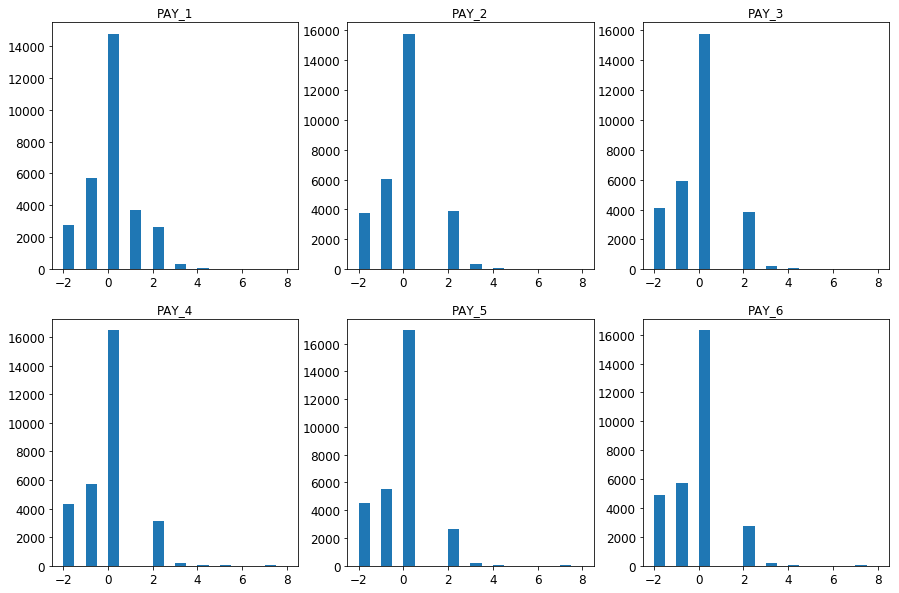

In [18]:
fig = plt.figure(figsize = (15, 10))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(x = df["PAY_" + str(i)], bins = 20)
    ax.set_title("PAY_" + str(i))

plt.show()

What is -2?

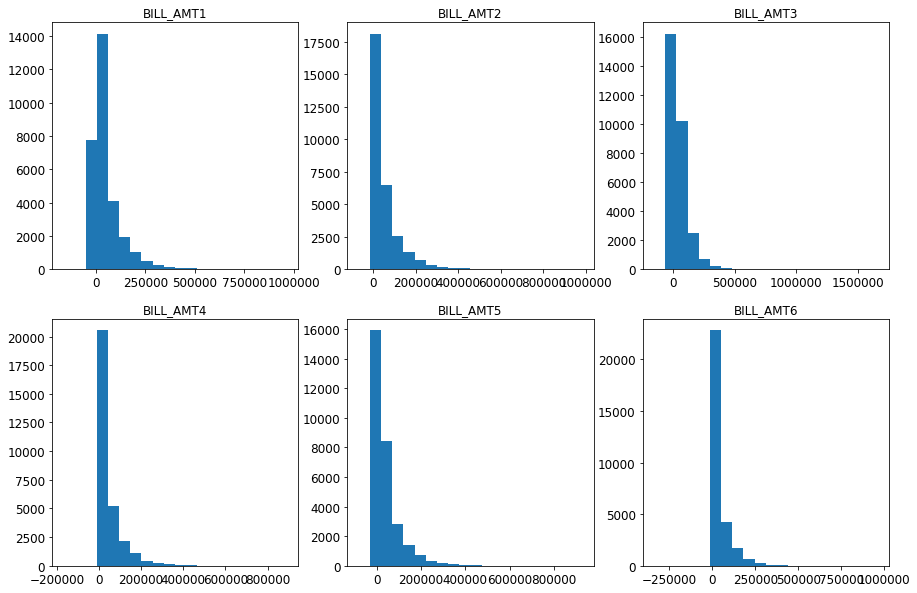

In [19]:
fig = plt.figure(figsize = (15, 10))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(x = df["BILL_AMT" + str(i)], bins = 20)
    ax.set_title("BILL_AMT" + str(i))

plt.show()

Some balances are negative, also too right tailed, should normalize

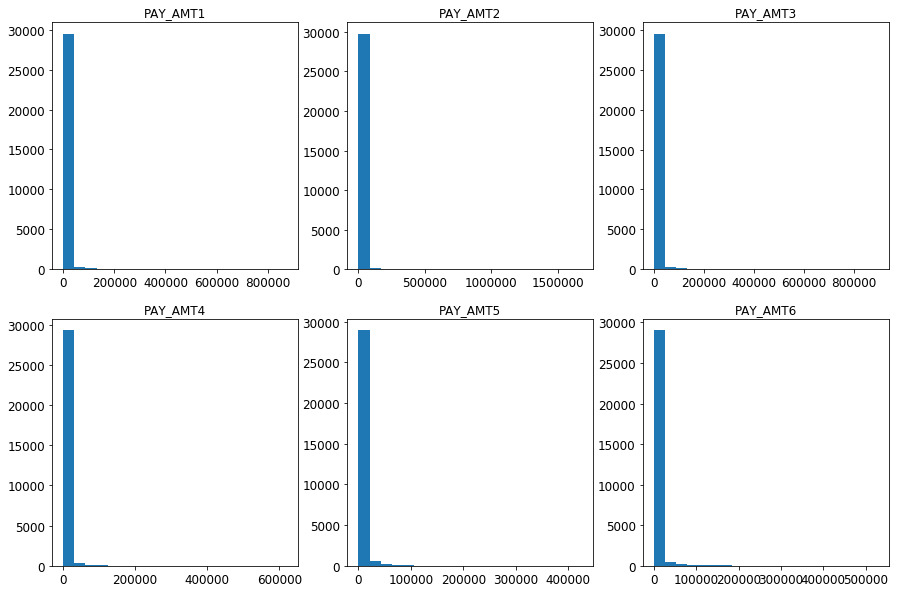

In [20]:
fig = plt.figure(figsize = (15, 10))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(x = df["PAY_AMT" + str(i)], bins = 20)
    ax.set_title("PAY_AMT" + str(i))

plt.show()

Payment amount is too right tailed, should normalize

# Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train = df_train.copy()
df_test = df_test.copy()

In [22]:
df_train_y = df_train['DEFAULT'].copy()
df_train_X = df_train.drop('DEFAULT', axis = 1)

In [23]:
df_train_y.head()

21753    0
251      0
22941    0
618      0
17090    0
Name: DEFAULT, dtype: int64

In [24]:
df_train_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,80000,F,University,Single,24,0,0,0,0,0,...,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
251,30000,M,University,Single,28,0,0,0,0,0,...,29155,25255,22001,0,5006,1244,851,955,0,0
22941,180000,F,Others,Married,44,0,0,-1,-1,-1,...,850,0,6881,10340,0,850,0,6881,10340,182
618,60000,M,GradSchool,Single,25,0,0,0,0,0,...,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17090,130000,F,University,Single,25,0,0,0,0,0,...,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700


In [25]:
df_test_y = df_test['DEFAULT'].copy()
df_test_X = df_test.drop('DEFAULT', axis = 1)

In [26]:
df_train_y.sum() / df_train_X.shape[0]

0.22179166666666666

In [27]:
df_test_y.sum() / df_test_X.shape[0]

0.21883333333333332

Class ratios for both training and test set are fairly similar

# Data Cleaning Pipeline

In [28]:
# From https://ramhiser.com/post/2018-04-16-building-scikit-learn-pipeline-with-pandas-dataframe/

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

class ColumnExcluder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[set(X.columns) - set(self.columns)]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [29]:
cs = ColumnSelector(['AGE','EDUCATION'])
cs.fit_transform(df_train_X).head()

,AGE,EDUCATION
21753,24,University
251,28,University
22941,44,Others
618,25,GradSchool
17090,25,University


In [30]:
ce = ColumnExcluder(columns=['PAY_' + str(i) for i in range(1, 7)])
ce.fit_transform(df_train_X).head()

,BILL_AMT4,PAY_AMT4,SEX,AGE,PAY_AMT3,PAY_AMT2,BILL_AMT5,EDUCATION,BILL_AMT3,PAY_AMT6,PAY_AMT1,BILL_AMT1,LIMIT_BAL,BILL_AMT6,PAY_AMT5,BILL_AMT2,MARRIAGE
21753,73731,1218,F,24,2092,5001,39643,University,78321,878,3503,75125,80000,39457,1445,77353,Single
251,25255,955,M,28,851,1244,22001,University,29155,0,5006,29242,30000,0,0,29507,Single
22941,0,6881,F,44,0,850,6881,Others,850,182,0,20916,180000,10340,10340,0,Married
618,39639,1500,M,25,2000,1900,39619,GradSchool,38533,2000,2018,58839,60000,39140,1900,53235,Single
17090,117823,5000,F,25,5000,4200,120854,University,114734,10700,4100,111587,130000,123904,5000,112348,Single


In [31]:
ts_categorical = TypeSelector("object")
ts_categorical.fit_transform(df_train_X).head()

,SEX,EDUCATION,MARRIAGE
21753,F,University,Single
251,M,University,Single
22941,F,Others,Married
618,M,GradSchool,Single
17090,F,University,Single


In [32]:
ts_numerical = TypeSelector(np.number)
ts_numerical.fit_transform(df_train_X).head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,80000,24,0,0,0,0,0,0,75125,77353,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
251,30000,28,0,0,0,0,0,0,29242,29507,29155,25255,22001,0,5006,1244,851,955,0,0
22941,180000,44,0,0,-1,-1,-1,-1,20916,0,850,0,6881,10340,0,850,0,6881,10340,182
618,60000,25,0,0,0,0,0,0,58839,53235,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17090,130000,25,0,0,0,0,0,0,111587,112348,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [34]:
preprocess_pipeline = make_pipeline(
    FeatureUnion(transformer_list=[
        ("numeric_features_untouch", make_pipeline(
            ColumnSelector(columns=['AGE'] + ['PAY_' + str(i) for i in range(1, 7)])
        )),
        ("numeric_features_transform", make_pipeline(
            ColumnSelector(columns=['LIMIT_BAL'] + ['PAY_AMT' + str(i) for i in range(1, 7)] + ['BILL_AMT' + str(i) for i in range(1, 7)] ),
            # Standardize
            MinMaxScaler(),
            # Normalize
            # StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            # Select all categorical features
            TypeSelector("object"),
            # One-Hot Encode
            OneHotEncoder()
        ))
    ])
)

# Transform Train/Test Data

In [35]:
preprocess_pipeline.fit(df_train_X)

df_train_X_transformed = preprocess_pipeline.transform(df_train_X)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [36]:
df_test_X_transformed = preprocess_pipeline.transform(df_test_X)

In [37]:
final_features = ['AGE'
                  , 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
                  , 'LIMIT_BAL'
                  , 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
                  , 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'
                  , 'F', 'M'
                  , 'GradSchool', 'HighSchool', 'Others', 'University'
                  , 'Married', 'Others', 'Single']

In [38]:
len(final_features)

29

In [39]:
pd.DataFrame(df_train_X_transformed.toarray(), columns=final_features).describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AGE,24000.0,35.494,9.235,21.0,28.000,34.000,42.000,79.0
PAY_1,24000.0,-0.017,1.126,-2.0,-1.000,0.000,0.000,8.0
PAY_2,24000.0,-0.131,1.198,-2.0,-1.000,0.000,0.000,8.0
PAY_3,24000.0,-0.168,1.192,-2.0,-1.000,0.000,0.000,8.0
PAY_4,24000.0,-0.220,1.168,-2.0,-1.000,0.000,0.000,8.0
PAY_5,24000.0,-0.265,1.133,-2.0,-1.000,0.000,0.000,8.0
PAY_6,24000.0,-0.289,1.152,-2.0,-1.000,0.000,0.000,8.0
LIMIT_BAL,24000.0,0.159,0.131,0.0,0.040,0.131,0.232,1.0
PAY_AMT1,24000.0,0.006,0.020,0.0,0.001,0.002,0.006,1.0
PAY_AMT2,24000.0,0.004,0.014,0.0,0.001,0.001,0.003,1.0


In [40]:
df_test_X_transformed.shape

(6000, 29)

In [41]:
df_train_y.shape

(24000,)

In [42]:
df_test_y.shape

(6000,)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

## *Initial Fit*

In [44]:
forest_clf = RandomForestClassifier(random_state = 42)

In [45]:
forest_clf.fit(df_train_X_transformed, df_train_y)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
# Fit the training set
y_predict_forest_train = forest_clf.predict(df_train_X_transformed)
y_proba_forest_train = forest_clf.predict_proba(df_train_X_transformed)

In [47]:
# Also fit on the test set
y_predict_forest_test = forest_clf.predict(df_test_X_transformed)
y_proba_forest_test = forest_clf.predict_proba(df_test_X_transformed)

In [48]:
# ROC AUC
print('ROC AUC - Train')
print(roc_auc_score(df_train_y, y_proba_forest_train[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(df_test_y, y_proba_forest_test[:,1]))

ROC AUC - Train
0.999134887197267
ROC AUC - Test
0.7311099830338846


In [49]:
# Mean Squared Error
print('MSE - Training')
print(np.sqrt(mean_squared_error(df_train_y, y_predict_forest_train)))
print('MSE - Test')
print(np.sqrt(mean_squared_error(df_test_y, y_predict_forest_test)))

MSE - Training
0.1439039031205663
MSE - Test
0.43779751788545657


Significant amount of overfitting - need to:
- Add regularization (e.g. set *max_depth*)

## *Feature Importance*

<function matplotlib.pyplot.show(*args, **kw)>

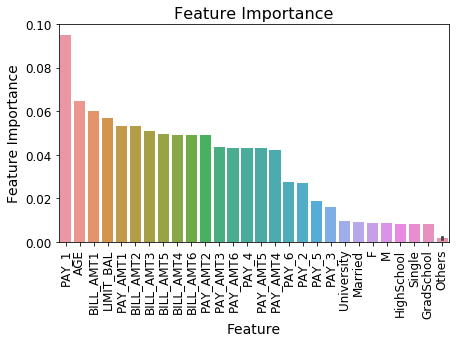

In [50]:
temp = pd.DataFrame({'Feature' : final_features
                     ,'Feature Importance' : forest_clf.feature_importances_})

temp = temp.sort_values(by='Feature Importance', ascending = False)

plt.figure(figsize = (7,4))
plt.title('Feature Importance', fontsize=16)
s = sns.barplot(x='Feature', y='Feature Importance', data=temp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show

Most importance features are:
- PAY_1
- AGE
- BILL_AMT1,
- LIMIT_BAL,
- PAY_AMT1

## *Cross-Validation*

In [51]:
# 4-fold CV, predict the probablies in order to to calculate ROC AUC

y_proba_forest_train_cv = cross_val_predict(forest_clf
                                            ,df_train_X_transformed
                                            ,df_train_y
                                            ,cv=4
                                            ,method="predict_proba")

In [52]:
roc_auc_score(df_train_y, y_proba_forest_train_cv[:, 1]) # target score, prob of positive class

0.7301572976900657

In [53]:
# Plot ROC curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])

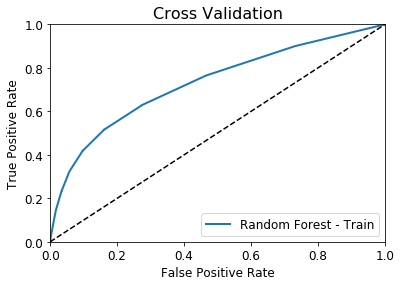

In [54]:
fpr_forest_train_cv, tpr_forest_train_cv, thresholds_forest_train_cv = roc_curve(df_train_y, y_proba_forest_train_cv[:, 1])
plot_roc_curve(fpr_forest_train_cv, tpr_forest_train_cv, "Random Forest - Train")

plt.title('Cross Validation', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

## *GridSearch*

In [55]:
# GridSearch
param_grid = {'n_estimators' : [3, 4, 6, 7, 10, 20, 50, 100]}

forest_grid_cv = GridSearchCV(forest_clf
                              ,param_grid
                              ,cv = 4
                              ,scoring = 'neg_mean_squared_error'
                              ,n_jobs = -1
                              ,verbose = 2)

forest_grid_cv.fit(df_train_X_transformed, df_train_y)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   36.4s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [3, 4, 6, 7, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [56]:
forest_grid_cv.best_params_

{'n_estimators': 100}

In [57]:
forest_grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
# Fit the training set with the best estimator
y_predict_forest_train = forest_grid_cv.best_estimator_.predict(df_train_X_transformed)
y_proba_forest_train = forest_grid_cv.best_estimator_.predict_proba(df_train_X_transformed)

In [59]:
# Also fit on the test set
y_predict_forest_test = forest_grid_cv.best_estimator_.predict(df_test_X_transformed)
y_proba_forest_test = forest_grid_cv.best_estimator_.predict_proba(df_test_X_transformed)

In [60]:
# ROC AUC
print('ROC AUC - Train')
print(roc_auc_score(df_train_y, y_proba_forest_train[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(df_test_y, y_proba_forest_test[:,1]))

ROC AUC - Train
0.999992415835209
ROC AUC - Test
0.7615803365306414


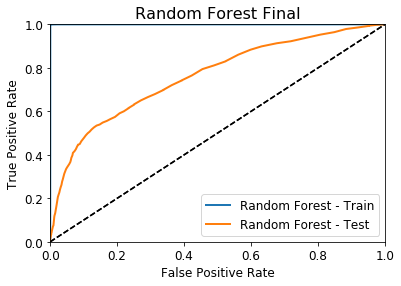

In [61]:
# ROC AUC curve
fpr_forest_train, tpr_forest_train, thresholds_forest_train = roc_curve(df_train_y, y_proba_forest_train[:,1])
fpr_forest_test, tpr_forest_test, thresholds_forest_test = roc_curve(df_test_y, y_proba_forest_test[:,1])

plot_roc_curve(fpr_forest_train, tpr_forest_train, "Random Forest - Train")
plot_roc_curve(fpr_forest_test, tpr_forest_test, "Random Forest - Test")

plt.title('Random Forest Final', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [62]:
# Mean Squared Error
print('MSE - Training')
print(np.sqrt(mean_squared_error(df_train_y, y_predict_forest_train)))
print('MSE - Test')
print(np.sqrt(mean_squared_error(df_test_y, y_predict_forest_test)))

MSE - Training
0.02327373340628157
MSE - Test
0.4306971093471606


Still significant amount of overfitting

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

## *Initial Fit*

In [64]:
knn_clf = KNeighborsClassifier()

In [65]:
knn_clf.fit(df_train_X_transformed, df_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
# Fit the training set
y_predict_knn_train = knn_clf.predict(df_train_X_transformed)
y_proba_knn_train = knn_clf.predict_proba(df_train_X_transformed)

In [67]:
# Also fit on the test set
y_predict_knn_test = knn_clf.predict(df_test_X_transformed)
y_proba_knn_test = knn_clf.predict_proba(df_test_X_transformed)

In [68]:
# ROC AUC
print('ROC AUC - Train')
print(roc_auc_score(df_train_y, y_proba_knn_train[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(df_test_y, y_proba_knn_test[:,1]))

ROC AUC - Train
0.879374492689534
ROC AUC - Test
0.7010787725963681


In [69]:
# Mean Squared Error
print('MSE - Training')
print(np.sqrt(mean_squared_error(df_train_y, y_predict_knn_train)))
print('MSE - Test')
print(np.sqrt(mean_squared_error(df_test_y, y_predict_knn_test)))

MSE - Training
0.3984344362627307
MSE - Test
0.454972526643093


A lot less overfitting than in tree

## *Cross-Validation*

In [70]:
# 4-fold CV, predict the probablies in order to to calculate ROC AUC

y_proba_knn_train_cv = cross_val_predict(knn_clf
                                         ,df_train_X_transformed
                                         ,df_train_y
                                         ,cv=4
                                         ,method="predict_proba")

In [71]:
roc_auc_score(df_train_y, y_proba_knn_train_cv[:, 1]) 

0.698269777412106

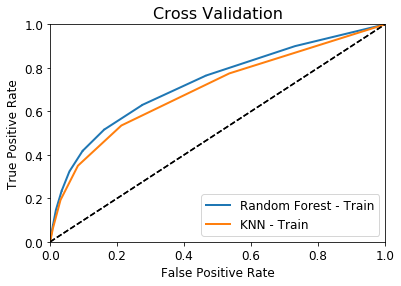

In [72]:
fpr_knn_train_cv, tpr_knn_train_cv, thresholds_knn_train_cv = roc_curve(df_train_y, y_proba_knn_train_cv[:, 1])

plot_roc_curve(fpr_forest_train_cv, tpr_forest_train_cv, "Random Forest - Train")
plot_roc_curve(fpr_knn_train_cv, tpr_knn_train_cv, "KNN - Train")

plt.title('Cross Validation', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

Random Forest has better ROC/AUC score

## *GridSearch*

In [73]:
# GridSearch
param_grid = {'n_neighbors' : [3, 4, 5, 7, 10, 20, 50]}

knn_grid_cv = GridSearchCV(knn_clf
                           ,param_grid
                           ,cv = 4
                           ,scoring = 'neg_mean_squared_error'
                           ,n_jobs = -1
                           ,verbose = 2)

knn_grid_cv.fit(df_train_X_transformed, df_train_y)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  3.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 4, 5, 7, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [74]:
knn_grid_cv.best_params_

{'n_neighbors': 20}

In [75]:
knn_grid_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [76]:
# Fit the training set with the best estimator
y_predict_knn_train = knn_grid_cv.best_estimator_.predict(df_train_X_transformed)
y_proba_knn_train = knn_grid_cv.best_estimator_.predict_proba(df_train_X_transformed)

In [77]:
# Also fit on the test set
y_predict_knn_test = knn_grid_cv.best_estimator_.predict(df_test_X_transformed)
y_proba_knn_test = knn_grid_cv.best_estimator_.predict_proba(df_test_X_transformed)

In [78]:
# ROC AUC
print('ROC AUC - Train')
print(roc_auc_score(df_train_y, y_proba_knn_train[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(df_test_y, y_proba_knn_test[:,1]))

ROC AUC - Train
0.8095736672407062
ROC AUC - Test
0.7315882874168167


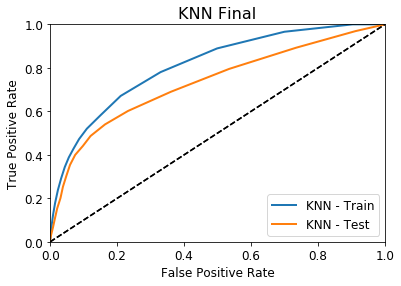

In [79]:
# ROC AUC curve
fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(df_train_y, y_proba_knn_train[:,1])
fpr_knn_test, tpr_knn_test, thresholds_knn_test = roc_curve(df_test_y, y_proba_knn_test[:,1])

plot_roc_curve(fpr_knn_train, tpr_knn_train, "KNN - Train")
plot_roc_curve(fpr_knn_test, tpr_knn_test, "KNN - Test")

plt.title('KNN Final', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [80]:
# Mean Squared Error
print('MSE - Training')
print(np.sqrt(mean_squared_error(df_train_y, y_predict_knn_train)))
print('MSE - Test')
print(np.sqrt(mean_squared_error(df_test_y, y_predict_knn_test)))

MSE - Training
0.4236252274514979
MSE - Test
0.4360810322252811


Higher MSE than Random Forest, but much less overfitting

# CV with 5-Folds

In [81]:
y_proba_forest_train_cv_v2 = cross_val_predict(forest_clf
                                            ,df_train_X_transformed
                                            ,df_train_y
                                            ,cv=5
                                            ,method="predict_proba")

In [82]:
y_proba_knn_train_cv_v2 = cross_val_predict(knn_clf
                                         ,df_train_X_transformed
                                         ,df_train_y
                                         ,cv=5
                                         ,method="predict_proba")

In [83]:
print('Random Forest - 5 Folds')
print(roc_auc_score(df_train_y, y_proba_forest_train_cv_v2[:, 1]))
print('KNN - 5 Folds')
print(roc_auc_score(df_train_y, y_proba_knn_train_cv_v2[:, 1]))

Random Forest - 5 Folds
0.7288674113075935
KNN - 5 Folds
0.7010533871790258


In [84]:
print('Random Forest - 4 Folds')
print(roc_auc_score(df_train_y, y_proba_forest_train_cv[:, 1]))
print('KNN - 4 Folds')
print(roc_auc_score(df_train_y, y_proba_knn_train_cv[:, 1]))

Random Forest - 4 Folds
0.7301572976900657
KNN - 4 Folds
0.698269777412106


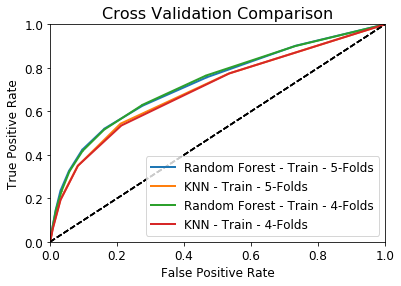

In [85]:
fpr_forest_train_cv_v2, tpr_forest_train_cv_v2, thresholds_forest_train_cv_v2 = roc_curve(df_train_y, y_proba_forest_train_cv_v2[:, 1])
fpr_knn_train_cv_v2, tpr_knn_train_cv_v2, thresholds_knn_train_cv_v2 = roc_curve(df_train_y, y_proba_knn_train_cv_v2[:, 1])

plot_roc_curve(fpr_forest_train_cv_v2, tpr_forest_train_cv_v2, "Random Forest - Train - 5-Folds")
plot_roc_curve(fpr_knn_train_cv_v2, tpr_knn_train_cv_v2, "KNN - Train - 5-Folds")
plot_roc_curve(fpr_forest_train_cv, tpr_forest_train_cv, "Random Forest - Train - 4-Folds")
plot_roc_curve(fpr_knn_train_cv, tpr_knn_train_cv, "KNN - Train - 4-Folds")

plt.title('Cross Validation Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

#### Conclusions?

Explain your results and choices

<pre>
For cross-validation with both 4-folds and 5-folds, Random Forest Classifier generated a higher ROC/AUC score than KNN Classifier on the training set. For Random Forest, by going from 4-folds to 5-folds, the ROC/AUC score actually deteriorated a little. For KNN, the score improved by a little.

There is a significant amount of overfitting in Random Forest, due to lack of regularization term (e.g. *max_depth*). Since we are only fitting on ~30 features, having no *max_depth* means that we can easily overfit the dataset. This resulted in very low ROC/AUC score for the final model on the test set, while absurdly high schore on the training set.

On the other hand, while KNN has slightly higher MSE scores for both the test and training set, they do not differ much, and the ROC/AUC scores are also very similar so there's very little overfitting.

Overall, Random Forest does perform better than KNN, but we should add regularization terms to decrease overfitting.
</pre>

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions
